---
# Install & Load
---

In [1]:
!pip install transformers
!pip install datasets
!pip install evaluate
!pip install accelerate
!pip install gluonts ujson
!pip install pytorch-lightning


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 88.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 14.3 MB/s eta 0:00:0

#### GluonTS

- Amazon에서 개발한 확률적 시계열 모델링을 위한 오픈 소스이며, 딥런이 기술을 사용하여 광범위한 시계열 모델을 구축, 교육 및 평가하기 위한 프레임워크 제공

- DeepAR, DeepFactor 및 WaveNet과 같은 시계열 예측을 위한 몇 가지 사전 구축된 모델과 데이터 전처리, 모델 선택 및 하이퍼파라미터 튜닝을 위한 도구가 포함

- 주요 기능 중 하나는 확률론적 예측에 중점을 둔 것으로
  - 각 시간 단계에 대한 전체 확률 분포를 출력

- CRPS(Continuous Rank Probability Score) 및 PIT(Probability Integral Transform) 히스토그램과 같은 확률적 예측의 정확도 및 보정을 평가하기 위한 도구를 제공
 

In [2]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

---
# Dataset
----

In [3]:
# 1998년 1월부터 2019년 6월까지 다양한 국가 및 지역에서 호주에 도착한 월간 국제 방문자로 구성된 Tourism_Monthly 데이터 세트
dataset = load_dataset("monash_tsf", "tourism_monthly")

Generating train split:   0%|          | 0/366 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/366 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/366 [00:00<?, ? examples/s]

Dataset monash_tsf downloaded and prepared to /root/.cache/huggingface/datasets/monash_tsf/tourism_monthly/1.0.0/82998723d55d6edbc664cfaebe371004d849846ee5f61b57f1f974000d44c050. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
dataset['train']

Dataset({
    features: ['start', 'target', 'feat_static_cat', 'feat_dynamic_real', 'item_id'],
    num_rows: 366
})

In [5]:
print(dataset['train'][0]['start'])
print(dataset['train'][0]['target'])

1979-01-01 00:00:00
[1149.8699951171875, 1053.8001708984375, 1388.8797607421875, 1783.3702392578125, 1921.025146484375, 2704.94482421875, 4184.41357421875, 4148.35400390625, 2620.72509765625, 1650.300048828125, 1115.9200439453125, 1370.6251220703125, 1096.31494140625, 978.4600219726562, 1294.68505859375, 1480.465087890625, 1748.865234375, 2216.920166015625, 4690.5185546875, 4682.8642578125, 2459.579833984375, 1484.4901123046875, 1028.985107421875, 1109.3648681640625, 960.8751220703125, 896.35009765625, 1118.6551513671875, 1619.9949951171875, 1847.994873046875, 2367.044921875, 4991.16015625, 4772.9443359375, 2894.678466796875, 1860.4801025390625, 1185.150146484375, 1313.659912109375, 1160.9150390625, 1061.5048828125, 1301.77001953125, 1794.3797607421875, 2106.455078125, 2789.034912109375, 4917.8466796875, 4994.4833984375, 3016.754150390625, 1941.505126953125, 1234.135009765625, 1378.72021484375, 1182.9749755859375, 1081.6600341796875, 1424.110107421875, 1774.5350341796875, 2115.42016601

In [6]:
print('train_length:',len(dataset['train'][0]['target']))
print('valid_length:',len(dataset['validation'][0]['target']))

train_length: 139
valid_length: 163


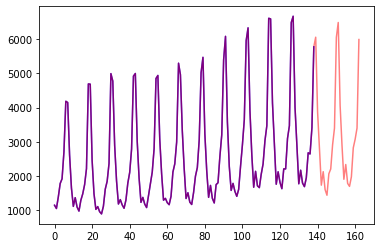

In [7]:
figure, axes = plt.subplots()
axes.plot(dataset['train'][0]['target'], color="blue")
axes.plot(dataset['validation'][0]['target'], color="red", alpha=0.5)

plt.show()

In [8]:
# 데이터셋 분할
train_dataset = dataset["train"]
test_dataset = dataset["test"]

In [9]:
# start feature의 시계열 기능을 pandas 인덱스로 변환 
from functools import lru_cache
'''lru_cache는 가장 최근에 사용한 캐시를 나타내며 함수의 결과를 메모리 하는데 사용
   동일한 입력으로 함수를 여러번 호출할 때 시간을 절약하는데 사용할 수 있음
   
   즉, 계산을 하는 함수가 있을 때, 데코레이터를 추가함으로써 각 호출 결과를 기억하고
   동일한 인수로 함수가 다시 호출되면 직접 반환하는 기능을 수행
   데코레이터 옆에 (maxsize = n)를 작성함으로써 최대 저장 개수를 설정할 수 있음'''

freq = '1M'
prediction_length = 24

@lru_cache(10000)
def convert_to_pandas_period(data, freq):
    return pd.Period(data,freq)

def transform_start_field(batch, freq):
    batch["start"] = [convert_to_pandas_period(date, freq) for date in batch["start"]]
    return batch    

In [10]:
from functools import partial
'''일부 인수를 수정하여 기존 함수에서 새 함수를 만드는데 사용하는 함수
   a,b,c를 인수로 받는 함수의 경우
   new_function = partial(my_function, b=2, c=3)
   result = new_function(a=1) 처럼 사용할 수 있음'''

train_dataset.set_transform(partial(transform_start_field, freq=freq))
test_dataset.set_transform(partial(transform_start_field, freq=freq))

In [11]:
from gluonts.time_feature import get_lags_for_frequency
'''주어진 시간 빈도(여기서는 1M)에 대한 시차 값을 계산하는 함수
   시간 주파수를 입력으로 사용하고 해당 주파수의 지연 값을 나타내는 정수 값 목록을 반환'''

from gluonts.time_feature import time_features_from_frequency_str
'''주어진 주파수 문자열(여기서는 1M)에서 시간 특성을 생성하기 위한 함수
   시간 기능은 기계학습 모델에 대한 추가 입력으로 사용되어 시계열의 시간 인덱스와 관련된 패턴을 캡처하는데 도움이 됨'''   
   
lags_sequence = get_lags_for_frequency(freq)
print(lags_sequence) # 각 시간 단계에 대해 최대 37개월을 되돌아 볼 수 있음

time_features = time_features_from_frequency_str(freq)
print(time_features) # 각 시간 단계에 대해 월을 스칼라 값으로 추가

[1, 2, 3, 4, 5, 6, 7, 11, 12, 13, 23, 24, 25, 35, 36, 37]
[<function month_of_year at 0x7fd0c4fa6b80>]


---
# Model
---

In [12]:
# 시계열 예측을 위한 transformer 기반 모델을 생성하기 위한 도구
# 첫번째는 모델에 대한 하이퍼파라미터 및 구성 옵션을 정의
# 두번째는 모델을 생성하고 새 데이터를 예측하는데 사용
from transformers import TimeSeriesTransformerConfig, TimeSeriesTransformerForPrediction

config = TimeSeriesTransformerConfig(
    # 미래에 예측할 시간 단계의 수
    prediction_length=prediction_length,

    # 모델에 대한 입력 임베딩을 생성하는데 사용되는 컨텍스트의 길이
    context_length=prediction_length * 2,

    # 시계열의 지연된 값을 생성하는데 사용할 정수 목록 
    lags_sequence=lags_sequence,

    # 데이터 세트에 포함할 시간 관련 기능의 수 지정
    # 모델이 시간, 요일, 계정성과 관련될 수 있는 시계열데이터의 패턴을 학습하는데 도움이 됨
    num_time_features=len(time_features) + 1,
    
    # 데이터 세트의 정적 부분(지리적 위치와 같은 시간이 지나도 변경되지 않는)에 있는 범주 기능의 수 지정
    # 모델이 다른 범주 또는 그룹에 특정한 패턴을 학습하는데 도움이 됨
    num_static_categorical_features=1,

    # 카디널리티 값 (전체 행에 대한 특정 수치의 중복 수치)
    cardinality=[len(train_dataset)],

    # 임베딩 차원
    embedding_dimension=[2],
    encoder_layers=4,
    decoder_layers=4,
    d_model=32,
)

model = TimeSeriesTransformerForPrediction(config)

In [13]:
from gluonts.time_feature import (
    time_features_from_frequency_str,
    TimeFeature,
    get_lags_for_frequency)

from gluonts.dataset.field_names import FieldName
from gluonts.transform import (
    AddAgeFeature,
    AddObservedValuesIndicator,
    AddTimeFeatures,
    AsNumpyArray,
    Chain,
    ExpectedNumInstanceSampler,
    InstanceSplitter,
    RemoveFields,
    SelectFields,
    SetField,
    TestSplitSampler,
    Transformation,
    ValidationSplitSampler,
    VstackFeatures,
    RenameFields)

from transformers import PretrainedConfig

In [14]:
# 원시 시계열 데이터를 transformer 모델에서 사용할 수 있는 형식으로 뵨환하기 위한 파이프라인 생성 
def create_transformation(freq: str, config: PretrainedConfig):
    remove_field_names = [] # 데이터세트에서 제거해야 하는 필드 이름 저장 
    if config.num_static_real_features == 0:
        remove_field_names.append(FieldName.FEAT_STATIC_REAL)
    if config.num_dynamic_real_features == 0:
        remove_field_names.append(FieldName.FEAT_DYNAMIC_REAL)
    if config.num_static_categorical_features == 0:
        remove_field_names.append(FieldName.FEAT_STATIC_CAT)

    # torchvision.transforms.Compose 처럼 변환 
    return Chain(
        # step 1: 지정된 필드를 제거
        [RemoveFields(field_names=remove_field_names)]

        # step 2: 값을 numpy 배열로 변환
        + ([AsNumpyArray(
                    field=FieldName.FEAT_STATIC_CAT,
                    expected_ndim=1,
                    dtype=int)]
            if config.num_static_categorical_features > 0
            else []
          )
        + ([AsNumpyArray(
                    field=FieldName.FEAT_STATIC_REAL,
                    expected_ndim=1)]
            if config.num_static_real_features > 0
            else []
          )
        + [AsNumpyArray(
                field=FieldName.TARGET,
                expected_ndim=1 if config.input_size == 1 else 2,
            ),
            # step 3: 대상 필드의 누락된 값을 모두 0으로 채움
            # output은 대상 필드에서 관찰된 값과 누락된 값을 나타내는 이진 마스크
            AddObservedValuesIndicator(
                target_field=FieldName.TARGET,
                output_field=FieldName.OBSERVED_VALUES,
            ),
            # step 4: 데이터세트에 시간적 특성 추가
            # 빈도에 따라 월, 일, 시간과 같은 기능을 추가할 수 있으며 
            # 해당 기능은 position encoding으로 사용
            AddTimeFeatures(
                start_field=FieldName.START,
                target_field=FieldName.TARGET,
                output_field=FieldName.FEAT_TIME,
                time_features=time_features_from_frequency_str(freq),
                pred_length=config.prediction_length,
            ),
            # step 5: 다른 시간적 특성 추가
            AddAgeFeature(
                target_field=FieldName.TARGET,
                output_field=FieldName.FEAT_AGE,
                pred_length=config.prediction_length,
                log_scale=True,
            ),
            # step 6: 모든 시간적 특성을 수직으로 쌓음
            # 수직으로 쌓는 이유는 신경망에 입력할 다양한 유형의 기능을 사용할 수 있는 단일 텐서로 결합하기 위해서
            # 즉, 서로 다른 기능이 두 번째 축을 따라 연결되어 각 행이 시계열의 다른 시간 단계를 나타내고 각 열이 다른 기능을 나타내는 행렬을 효과적으로 생성
            VstackFeatures(
                output_field=FieldName.FEAT_TIME,
                input_fields=[FieldName.FEAT_TIME, FieldName.FEAT_AGE]
                + (
                    [FieldName.FEAT_DYNAMIC_REAL]
                    if config.num_dynamic_real_features > 0
                    else []
                ),
            ),
            # step 7: 이름 변경
            RenameFields(
                mapping={
                    FieldName.FEAT_STATIC_CAT: "static_categorical_features",
                    FieldName.FEAT_STATIC_REAL: "static_real_features",
                    FieldName.FEAT_TIME: "time_features",
                    FieldName.TARGET: "values",
                    FieldName.OBSERVED_VALUES: "observed_mask",
                })])


- ExpectedNumInstanceSampler
  - 예상 인스턴스 수를 지정하여 시계열 데이터에서 인스턴스를 생성하는 샘플러

  - 훈련을 위해 고정된 수의 인스턴스를 생성하려는 경우에 유용 

  - 예측 길이와 예측에 필요한 최소 히스토리 길이와 동일한 보폭으로 인스턴스를 샘플링

  - 인스턴스가 적을 경우 일부 인스턴스는 두 번 이상 샘플링 될 수 있으며  
    많을 경우 건너뛸 수도 있음

- ValidationSplitSampler

  - 트레이닝 세트에 포함될 각 시계열에 대한 마지막 예측 길이 시점을 제외한 모든 것을 선택하여 시계열 데이터 세트를 트레이닝 세트와 검증 세트로 분할하는 샘플러

  - 학습 중 본적이 없는 데이터에 대한 모델의 성능을 평가하려는 경우에 유용

- TestSplitSampler

  - 트레이닝 세트에 포함될 각 시계열의 마지막 예측 길이의 시점과 테스트 세트에 있는 마지막 예측 길이 시점을 제외한 모든 것을 선택하는 샘플러

  - 학습 후 완전히 본 적 없는 데이터에 대해 모델의 성능을 평가하려는 경우 유용
  

In [15]:
from gluonts.transform.sampler import InstanceSampler # 딥러닝 모델 훈련을 위한 시계열 데이터 샘플링에 사용
from typing import Optional

def create_instance_splitter(config, mode : str, train_sampler = None, validation_sampler = None):
    
    assert mode in ['train','validation','test']

    instance_sampler = {'train' : train_sampler or ExpectedNumInstanceSampler(
                                            num_instances = 1.0, min_future = config.prediction_length),
                        'validation' : validation_sampler or ValidationSplitSampler(
                                            min_future = config.prediction_length),
                        'test' : TestSplitSampler()}[mode]

    # train / valid / test로 분할
    return InstanceSplitter(target_field = 'values',                 # 대상 값을 포함하는 필드의 이름
                            is_pad_field = FieldName.IS_PAD,         # 패딩 마스크를 포함하는 필드의 이름
                            start_field = FieldName.START,           # 시작 타임스탬프를 포함하는 필드의 이름
                            forecast_start_field = FieldName.FORECAST_START, # 예측 시작 타임스탬프가 포함된 필드의 이름
                            instance_sampler = instance_sampler,     # 사용할 인스턴스 샘플러 객체
                            past_length = config.context_length + max(config.lags_sequence), # 모델에 대한 입력으로 사용되는 과거 이력의 길이
                            future_length=config.prediction_length,  # 모델이 예측하는 미래의 길이 
                            time_series_fields=["time_features", "observed_mask"]) # 시계열에 포함되는 필드 이름 목록

---
# DataLoader
---

In [16]:
# Cyclic = 무한 순환 이터러블을 생성 
# IterableSlice = 주어진 시작, 끝 및 단계와 함께 주어진 반복 가능한 객체의 슬라이스를 반환하는 반복 가능한 객체를 생성
# PseudoShuffled = 주어진 반복 가능한 객체에서 무작위 순서로 항목을 생성하는 반복 가능한 객체 생성
from gluonts.itertools import Cyclic, IterableSlice, PseudoShuffled
from gluonts.torch.util import IterableDataset
from torch.utils.data import DataLoader
from typing import Iterable

def create_train_dataloader(config, freq, data, batch_size, num_batches_per_epoch, shuffle_buffer_length = None, **kwargs):
    PREDICTION_INPUT_NAMES = [ "past_time_features", "past_values", "past_observed_mask", "future_time_features"]

    if config.num_static_categorical_features > 0 :
        PREDICTION_INPUT_NAMES.append('static_categorical_features')

    if config.num_static_real_features > 0 :
        PREDICTION_INPUT_NAMES.append('static_real_features')

    TRAINING_INPUT_NAMES = PREDICTION_INPUT_NAMES + ['future_values', 'future_observed_mask']

    transformation = create_transformation(freq, config)
    transformed_data = transformation.apply(data, is_train = True)

    # train 인스턴스 초기화
    instance_splitter = create_instance_splitter(config, 'train') + SelectFields(TRAINING_INPUT_NAMES)

    # train 인스턴스 생성
    # 결과값은 훈련 배치를 생성하며 각 예제는 context_length + lags_sequence + prediction_length 단계로 구성된 시계열 데이터
    # 해당 데이터는 instance_splitter에 의해 변환된 데이터에서 무작위로 샘플링되어 텐서 배치로 반환
    training_instances = instance_splitter.apply(Cyclic(transformed_data)
                                                if shuffle_buffer_length is None 
                                                else PseudoShuffled(Cyclic(transformed_data),
                                                                    shuffle_buffer_length=shuffle_buffer_length))
    
    return IterableSlice(iter(DataLoader(IterableDataset(training_instances),
                                         batch_size = batch_size,
                                         **kwargs)),
                         num_batches_per_epoch)


In [17]:
def create_test_dataloader(config, freq, data, batch_size, **kwargs):

    PREDICTION_INPUT_NAMES = ["past_time_features", "past_values", "past_observed_mask", "future_time_features"]
    
    if config.num_static_categorical_features > 0:
        PREDICTION_INPUT_NAMES.append("static_categorical_features")

    if config.num_static_real_features > 0:
        PREDICTION_INPUT_NAMES.append("static_real_features")

    transformation = create_transformation(freq, config)
    transformed_data = transformation.apply(data, is_train=False)

    instance_sampler = create_instance_splitter(config, "test") + SelectFields(PREDICTION_INPUT_NAMES)

    # test mode
    testing_instances = instance_sampler.apply(transformed_data, is_train=False)

    return DataLoader(IterableDataset(testing_instances), 
                      batch_size=batch_size, 
                      **kwargs)

In [18]:
train_dataloader = create_train_dataloader(
    config=config,
    freq=freq,
    data=train_dataset,
    batch_size=256,
    num_batches_per_epoch=100,
)

test_dataloader = create_test_dataloader(
    config=config,
    freq=freq,
    data=test_dataset,
    batch_size=64,
)


In [19]:
batch = next(iter(train_dataloader))
for k, v in batch.items():
    print(k, v.shape, v.type())

past_time_features torch.Size([256, 85, 2]) torch.FloatTensor
past_values torch.Size([256, 85]) torch.FloatTensor
past_observed_mask torch.Size([256, 85]) torch.FloatTensor
future_time_features torch.Size([256, 24, 2]) torch.FloatTensor
static_categorical_features torch.Size([256, 1]) torch.LongTensor
future_values torch.Size([256, 24]) torch.FloatTensor
future_observed_mask torch.Size([256, 24]) torch.FloatTensor


In [20]:
next(iter(train_dataloader))

{'past_time_features': tensor([[[ 0.3182,  2.1173],
          [ 0.4091,  2.1206],
          [ 0.5000,  2.1239],
          ...,
          [ 0.1364,  2.3284],
          [ 0.2273,  2.3304],
          [ 0.3182,  2.3324]],
 
         [[-0.5000,  1.5798],
          [-0.4091,  1.5911],
          [-0.3182,  1.6021],
          ...,
          [ 0.4091,  2.0792],
          [ 0.5000,  2.0828],
          [-0.5000,  2.0864]],
 
         [[ 0.0455,  1.8325],
          [ 0.1364,  1.8388],
          [ 0.2273,  1.8451],
          ...,
          [-0.1364,  2.1761],
          [-0.0455,  2.1790],
          [ 0.0455,  2.1818]],
 
         ...,
 
         [[ 0.0000,  0.0000],
          [ 0.0000,  0.0000],
          [ 0.0000,  0.0000],
          ...,
          [-0.3182,  1.7160],
          [-0.2273,  1.7243],
          [-0.1364,  1.7324]],
 
         [[ 0.4091,  1.8573],
          [ 0.5000,  1.8633],
          [-0.5000,  1.8692],
          ...,
          [ 0.2273,  2.1875],
          [ 0.3182,  2.1903],
     

---
# Train
---

In [21]:
# forward pass
# 디코더가 future_values 레이블을 갖기 위해 자동으로 한 단계 오른쪽으로 이동하기 때문에 손실값을 계산할 수 있음
outputs = model(
    past_values=batch["past_values"],
    past_time_features=batch["past_time_features"],
    past_observed_mask=batch["past_observed_mask"],
    static_categorical_features=batch["static_categorical_features"]
    if config.num_static_categorical_features > 0
    else None,
    static_real_features=batch["static_real_features"]
    if config.num_static_real_features > 0
    else None,
    future_values=batch["future_values"],
    future_time_features=batch["future_time_features"],
    future_observed_mask=batch["future_observed_mask"],
    output_hidden_states=True,
)

print("Loss:", outputs.loss.item())

Loss: 9.586390495300293


In [22]:
from accelerate import Accelerator
from torch.optim import AdamW
from tqdm.notebook import tqdm 

epochs = 40 

accelerator = Accelerator()
device = accelerator.device

model.to(device)
optimizer = AdamW(model.parameters(), lr=6e-4, betas=(0.9, 0.95), weight_decay=1e-1)

model, optimizer, train_dataloader = accelerator.prepare(model, optimizer, train_dataloader)

model.train()
for epoch in tqdm(range(epochs)):
    for idx, batch in enumerate(tqdm(train_dataloader)):
        optimizer.zero_grad()
        outputs = model(
            static_categorical_features=batch["static_categorical_features"].to(device)
            if config.num_static_categorical_features > 0
            else None,
            static_real_features=batch["static_real_features"].to(device)
            if config.num_static_real_features > 0
            else None,
            past_time_features=batch["past_time_features"].to(device),
            past_values=batch["past_values"].to(device),
            future_time_features=batch["future_time_features"].to(device),
            future_values=batch["future_values"].to(device),
            past_observed_mask=batch["past_observed_mask"].to(device),
            future_observed_mask=batch["future_observed_mask"].to(device),
        )
        loss = outputs.loss

        # Backpropagation
        accelerator.backward(loss)
        optimizer.step()

        if idx % 100 == 0:
            print(f'epoch : {epoch + 1} Loss: {loss.item()}')


  0%|          | 0/40 [00:00<?, ?it/s]

0it [00:00, ?it/s]

epoch : 1 Loss: 8.97652530670166


0it [00:00, ?it/s]

epoch : 2 Loss: 8.218300819396973


0it [00:00, ?it/s]

epoch : 3 Loss: 7.756662368774414


0it [00:00, ?it/s]

epoch : 4 Loss: 7.570166110992432


0it [00:00, ?it/s]

epoch : 5 Loss: 6.910028457641602


0it [00:00, ?it/s]

epoch : 6 Loss: 7.016774654388428


0it [00:00, ?it/s]

epoch : 7 Loss: 6.797025680541992


0it [00:00, ?it/s]

epoch : 8 Loss: 6.713674545288086


0it [00:00, ?it/s]

epoch : 9 Loss: 7.1772780418396


0it [00:00, ?it/s]

epoch : 10 Loss: 6.750102996826172


0it [00:00, ?it/s]

epoch : 11 Loss: 7.51102876663208


0it [00:00, ?it/s]

epoch : 12 Loss: 7.5679168701171875


0it [00:00, ?it/s]

epoch : 13 Loss: 6.86249303817749


0it [00:00, ?it/s]

epoch : 14 Loss: 7.0028157234191895


0it [00:00, ?it/s]

epoch : 15 Loss: 7.161323070526123


0it [00:00, ?it/s]

epoch : 16 Loss: 7.610592365264893


0it [00:00, ?it/s]

epoch : 17 Loss: 7.512418270111084


0it [00:00, ?it/s]

epoch : 18 Loss: 6.818384647369385


0it [00:00, ?it/s]

epoch : 19 Loss: 7.695353031158447


0it [00:00, ?it/s]

epoch : 20 Loss: 7.474620819091797


0it [00:00, ?it/s]

epoch : 21 Loss: 7.436054229736328


0it [00:00, ?it/s]

epoch : 22 Loss: 6.947962284088135


0it [00:00, ?it/s]

epoch : 23 Loss: 6.520299434661865


0it [00:00, ?it/s]

epoch : 24 Loss: 7.095879077911377


0it [00:00, ?it/s]

epoch : 25 Loss: 7.330593109130859


0it [00:00, ?it/s]

epoch : 26 Loss: 7.49268102645874


0it [00:00, ?it/s]

epoch : 27 Loss: 6.94030237197876


0it [00:00, ?it/s]

epoch : 28 Loss: 7.077584743499756


0it [00:00, ?it/s]

epoch : 29 Loss: 7.514307022094727


0it [00:00, ?it/s]

epoch : 30 Loss: 6.948610782623291


0it [00:00, ?it/s]

epoch : 31 Loss: 6.7156243324279785


0it [00:00, ?it/s]

epoch : 32 Loss: 7.1765055656433105


0it [00:00, ?it/s]

epoch : 33 Loss: 7.7159743309021


0it [00:00, ?it/s]

epoch : 34 Loss: 7.407816410064697


0it [00:00, ?it/s]

epoch : 35 Loss: 7.482639312744141


0it [00:00, ?it/s]

epoch : 36 Loss: 7.572396755218506


0it [00:00, ?it/s]

epoch : 37 Loss: 7.1371235847473145


0it [00:00, ?it/s]

epoch : 38 Loss: 6.967199802398682


0it [00:00, ?it/s]

epoch : 39 Loss: 6.8122878074646


0it [00:00, ?it/s]

epoch : 40 Loss: 7.4852752685546875


---
# Inference
---

In [23]:
model.eval()
forecasts = []

for batch in test_dataloader:
    outputs = model.generate(
        static_categorical_features=batch["static_categorical_features"].to(device)
        if config.num_static_categorical_features > 0
        else None,
        static_real_features=batch["static_real_features"].to(device)
        if config.num_static_real_features > 0
        else None,
        past_time_features=batch["past_time_features"].to(device),
        past_values=batch["past_values"].to(device),
        future_time_features=batch["future_time_features"].to(device),
        past_observed_mask=batch["past_observed_mask"].to(device),
    )
    forecasts.append(outputs.sequences.cpu().numpy())


In [24]:
print(len(forecasts))
print(forecasts[0].shape)
print(forecasts[1].shape)
print(forecasts[2].shape)
print(forecasts[3].shape)
print(forecasts[4].shape)
print(forecasts[5].shape)

6
(64, 100, 24)
(64, 100, 24)
(64, 100, 24)
(64, 100, 24)
(64, 100, 24)
(46, 100, 24)


In [25]:
forecasts = np.vstack(forecasts)
print(forecasts.shape)

(366, 100, 24)


In [26]:
# 테스트세트에 있는 샘플 값 중 실측값과 비교하요 예측 결과를 평가
from evaluate import load
from gluonts.time_feature import get_seasonality

mase_metric = load("evaluate-metric/mase")
smape_metric = load("evaluate-metric/smape")

forecast_median = np.median(forecasts, 1)

mase_metrics = []
smape_metrics = []
for item_id, ts in enumerate(test_dataset):
    training_data = ts["target"][:-prediction_length]
    ground_truth = ts["target"][-prediction_length:]
    mase = mase_metric.compute(
        predictions=forecast_median[item_id], 
        references=np.array(ground_truth), 
        training=np.array(training_data), 
        periodicity=get_seasonality(freq))
    mase_metrics.append(mase["mase"])
    
    smape = smape_metric.compute(
        predictions=forecast_median[item_id], 
        references=np.array(ground_truth), 
    )
    smape_metrics.append(smape["smape"])


In [27]:
print(f"MASE: {np.mean(mase_metrics)}")
print(f"sMAPE: {np.mean(smape_metrics)}")

MASE: 1.4429421914520593
sMAPE: 0.181023846448699


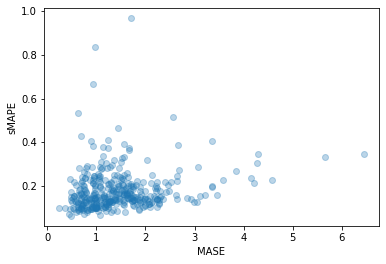

In [28]:
plt.scatter(mase_metrics, smape_metrics, alpha=0.3)
plt.xlabel("MASE")
plt.ylabel("sMAPE")
plt.show()

In [29]:
import matplotlib.dates as mdates

def plot(ts_index):
    fig, ax = plt.subplots()

    index = pd.period_range(
        start=test_dataset[ts_index][FieldName.START],
        periods=len(test_dataset[ts_index][FieldName.TARGET]),
        freq=freq,
    ).to_timestamp()

    # Major ticks every half year, minor ticks every month,
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())

    ax.plot(
        index[-2*prediction_length:], 
        test_dataset[ts_index]["target"][-2*prediction_length:],
        label="actual",
    )

    plt.plot(
        index[-prediction_length:], 
        np.median(forecasts[ts_index], axis=0),
        label="median",
    )
    
    plt.fill_between(
        index[-prediction_length:],
        forecasts[ts_index].mean(0) - forecasts[ts_index].std(axis=0), 
        forecasts[ts_index].mean(0) + forecasts[ts_index].std(axis=0), 
        alpha=0.3, 
        interpolate=True,
        label="+/- 1-std",
    )
    plt.legend()
    plt.show()


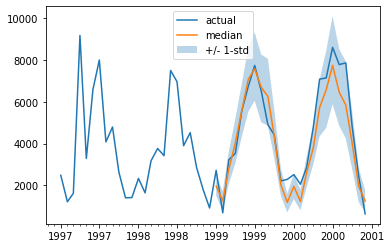

In [30]:
plot(365)

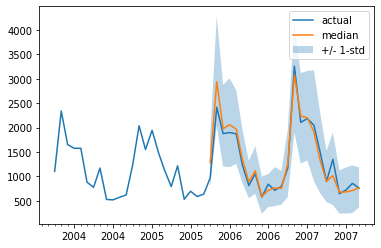

In [31]:
import random

value = random.randint(1,366)
plot(value)

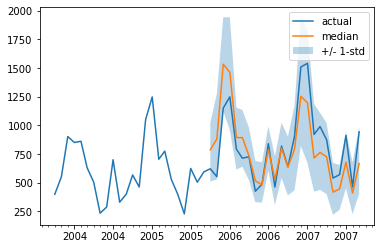

In [36]:
value = random.randint(1,366)
plot(value)